<a href="https://colab.research.google.com/github/AtaruOhto/pytorch_learning/blob/master/004_dataloader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

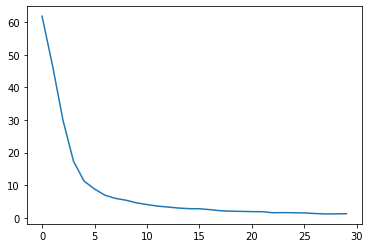

In [21]:
"""
PyTorch DataLoader, DataSet

参考: https://www.shoeisha.co.jp/book/detail/9784798157184
"""

import torch
from torch import nn, optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.datasets import load_digits

# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html
# 0から9までの10個の手書き文字のデータをロードする
digits = load_digits()

X = digits.data
y = digits.target

# データ形式: torch.Size([1797, 64])
X = torch.tensor(X, dtype=torch.float32)

# データ形式: torch.Size([1797]) 
y = torch.tensor(y, dtype=torch.int64)

# Datasetを作成
data_set = TensorDataset(X, y)

# すべてのデータをメモリに載せることができない場合、ミニバッチを利用する。
# 異なる順番で64個ずつデータを返すDataLoaderを作成する
# ミニバッチ学習やデータのシャッフル・並列計算を行うことが可能。
loader = DataLoader(data_set, batch_size=64, shuffle=True)

net = nn.Sequential(
  nn.Linear(64, 32),
  nn.ReLU(),
  nn.Linear(32, 16),
  nn.ReLU(),
  nn.Linear(16, 10)
)

loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())

losses = []

for _ in range(30):
  running_loss = 0.0

  for xx, yy in loader:
    # xxのデータ構造: torch.Size([64, 64])
    # yyのデータ構造: torch.Size([64])
    y_pred = net(xx)
    loss = loss_function(y_pred, yy)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  losses.append(running_loss)

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(losses)
